In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Mission1. Netfilx and Code

호주니는 요즘 넷플릭스를 보는데 심취해있다. 최근 넷플릭스와 협업하는 K-Contents가 늘어가는 것을 보면서 자부심을 느끼는 한편, 넷플릭스에 얼마나 많은 한국 작품이 있는지 궁금해졌다. 호주니를 도와 넷플릭스에 얼마나 많은 한국 작품이 있는지 알아보자.

In [44]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head()

# 결측치 확인. 결측치가 있는 column으론 작업하지 않겠다
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## Mandatory Part

넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

- 한국 작품은 총 얼마나 있는가?
 - country column을 기준으로 한다.
 - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [45]:
# 한국 작품만 갖는 새로운 dataframe 생성
netflix_korea = netflix_df[netflix_df["country"]=="South Korea"]

# 결측치가 없는 country column의 합계를 구해 한국 작품의 총 개수 알아내기
print("한국 작품의 개수 :", netflix_korea['country'].count())

한국 작품의 개수 : 183


생각보다 많은 작품이 있었음에 놀란 호주니는 K-콘텐츠를 넘어 글로벌 콘텐츠에 관심을 가지게 되었다. 이 과정에서 가장 많은 콘텐츠가 있는 국가는 어디일지 궁금해졌다. 호주니를 도와 이번에는 넷플릭스에서 가장 많은 작품을 만든 나라가 어디이고, 얼마나 많은 작품을 produce했는지 알아보자.

## Bonus Part

넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
 - country column을 기준으로 한다.
 - 단일 국가인 경우를 기준으로 결과를 구해보자.


In [70]:
number_of_works = netflix_df['show_id'].groupby(by=netflix_df['country']).count()

#sort_values를 이용해 정렬을 하면 가장 작은 것부터 큰 것순으로 정렬되기 때문에 
#뒤에 있는 것 하나만 가져오면 가장 많은 작품이 올라간 국가와 작품 개수를 알 수 있음
number_of_works.sort_values().tail(1)

country
United States    2555
Name: show_id, dtype: int64

# Mission 2. 가즈아!

서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 **Moving Average(이동평균법)** 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

In [286]:
bitcoin_df = pd.read_csv("BitCoin.csv")
bitcoin_df.head()

eth_df = pd.read_csv("ETH_day.csv")
eth_df.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


## Mandatory Part

다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

- 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.


In [337]:
# Date 데이터 형식을 datetime으로 변환
pd.to_datetime(bitcoin_df['Date'])

# rolling 함수를 이용해 5MA 산출
bitcoin_df['5MA']=bitcoin_df['Open'].rolling(window=5).mean()

# 2016년 6월부터 2017년 6월까지의 데이터만 남기기
bitcoin_df=bitcoin_df[bitcoin_df['Date']>='2016-06-01']
bitcoin_df=bitcoin_df[bitcoin_df['Date']<'2017-07-01']

# Date 데이터를 기준으로 정렬
bitcoin_df=bitcoin_df.sort_values(by='Date')

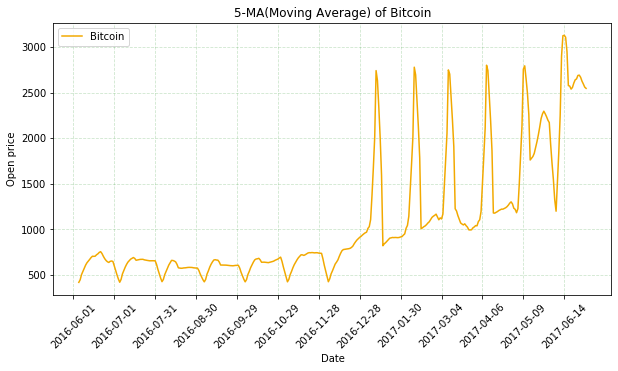

In [338]:
# 그래프 사이즈 지정
plt.figure(figsize=(10,5))

# x축은 date, y축은 5ma를 기준으로 꺾은선 그래프 생성.
# 선 색은 #f2a900, 선 라벨은 Bitcoin으로 생성
plt.plot(bitcoin_df['Date'], bitcoin_df['5MA'],'#f2a900', label='Bitcoin')

# 범례 표시
plt.legend()

# 그래프 제목 생성
plt.title('5-MA(Moving Average) of Bitcoin')

# xlabe, ylabel 지정
plt.xlabel('Date')
plt.ylabel('Open price')

# x 범주 30일 단위로 끊고, 45도 기울어진 각도로 나타나게끔 설정
plt.xticks(bitcoin_df['Date'][::30], rotation=45)

# 그래프 상에 그리드 선이 나타나게 설정
plt.grid(True, color='g', alpha=0.2, linestyle='--')

plt.show()

# x축의 date를 한 달 단위로 끊는 방법이 무엇인가요??

해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.

## Bonus Part

위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

- 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [339]:
pd.to_datetime(eth_df['Date'])

eth_df['5MA']=eth_df['Open'].rolling(window=5).mean()

eth_df=eth_df[eth_df['Date']>='2016-06-01']
eth_df=eth_df[eth_df['Date']<'2017-07-01']

eth_df=eth_df.sort_values(by='Date')

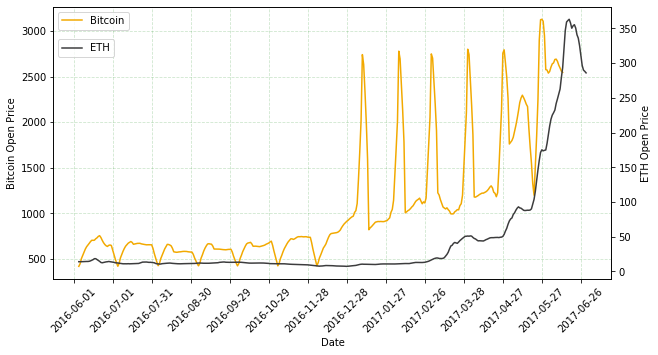

In [340]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot()

ax1.set_xlabel("Date")
ax1.set_ylabel("Bitcoin Open Price")
ax1.grid(True, color='g', alpha=0.2, linestyle='--')
ax1.plot(bitcoin_df['Date'], bitcoin_df['5MA'], color = '#f2a900', label='Bitcoin')
ax1.tick_params(axis='x', labelrotation = 45)

ax2 = ax1.twinx()
ax2.set_ylabel('ETH Open Price')
ax2.plot(eth_df['Date'], eth_df['5MA'], color = '#3c3c3d', label='ETH')
ax2.set_xticks(eth_df['Date'][::30])

ax1.legend(loc='upper left')
ax2.legend(bbox_to_anchor=(0, -0.1, 1, 1),loc='upper left')

plt.show()

# 분명 둘다 2016/06/01 ~ 2017/06/30 까지의 데이터인데 그래프의 위치가 맞지 않는 것일까요..?